<a href="https://colab.research.google.com/github/LeeSuA/MachineLearning-Study/blob/main/MultipleClassification_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 로이터 데이터셋(뉴스)을 46개의 상호 배타적인 토픽으로 분류하는 예제
- 단일 레이블 다중 분류 예제
- 훈련샘플 : 8982개 , 테스트샘플 : 2246개

In [ ]:
from keras.datasets import reuters

# num_words는 데이터에서 가장 자주 등장하는 단어 1만 개로 제한
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
     num_words=10000)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print(len(train_data))
print(len(test_data))

8982
2246


In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# 0, 1, 2는 ‘패딩’, ‘문서 시작’, ‘사전에 없음’을 위한 인덱스이므로 3을 뺍니다.

In [ ]:
train_labels[10]

3

In [ ]:
# 데이터 준비
# 데이터를 벡터로 변환
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [ ]:
# one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 2.9829 - accuracy: 0.4275 - val_loss: 1.5998 - val_accuracy: 0.6620
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4002 - accuracy: 0.7070 - val_loss: 1.2540 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0596 - accuracy: 0.7612 - val_loss: 1.1000 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8194 - accuracy: 0.8270 - val_loss: 1.0053 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6514 - accuracy: 0.8578 - val_loss: 0.9447 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5291 - accuracy: 0.8895 - val_loss: 0.9354 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4133 - accuracy: 0.9148 - val_loss: 0.8915 - val_accuracy: 0.8070
Epoch 8/20
16

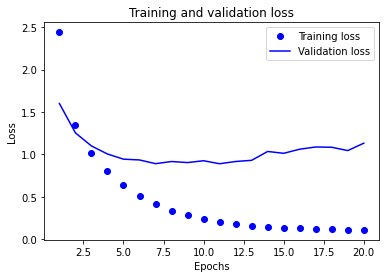

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

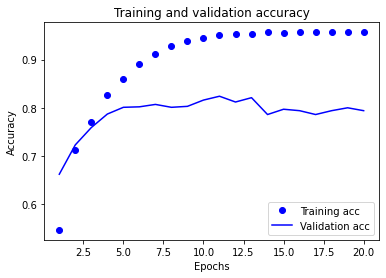

In [ ]:
plt.clf() # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 54ms/step - loss: 3.1249 - accuracy: 0.4030 - val_loss: 1.7294 - val_accuracy: 0.6520
Epoch 2/9
16/16 [==============================] - 1s 42ms/step - loss: 1.5101 - accuracy: 0.6927 - val_loss: 1.2962 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 1s 42ms/step - loss: 1.0637 - accuracy: 0.7772 - val_loss: 1.1248 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8333 - accuracy: 0.8190 - val_loss: 1.0209 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 42ms/step - loss: 0.6475 - accuracy: 0.8640 - val_loss: 0.9896 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5334 - accuracy: 0.8920 - val_loss: 0.9204 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.4055 - accuracy: 0.9169 - val_loss: 0.8982 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9961711168289185, 0.7925200462341309]